### Data Distribution


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys


In [3]:
data = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/osimertinib_main_smiles.csv')

In [4]:
print(data.describe())

       Smiles (RDKit Mol)  MACCS_sim_score  ECFP4_sim_score  \
count                 0.0        61.000000        61.000000   
mean                  NaN         0.922246         0.865016   
std                   NaN         0.063878         0.089416   
min                   NaN         0.740000         0.667000   
25%                   NaN         0.908000         0.822000   
50%                   NaN         0.939000         0.867000   
75%                   NaN         0.954000         0.907000   
max                   NaN         1.000000         1.000000   

       MCSS_rdkit_sim_score  Standard Value  
count             61.000000       61.000000  
mean               0.889098     1249.858852  
std                0.124740     6069.070767  
min                0.592000        0.010000  
25%                0.857000        2.090000  
50%                0.949000       17.800000  
75%                0.974000      122.000000  
max                1.000000    45000.000000  


In [5]:
from scipy.stats import skew, kurtosis

skewness = skew(data['Standard Value'])
kurt = kurtosis(data['Standard Value'])

print(f"Skewness: {skewness}, Kurtosis: {kurt}")


Skewness: 6.495256490440113, Kurtosis: 43.21496434887237


In [6]:
percentiles = data['Standard Value'].quantile([0.25, 0.5, 0.75])
print("Percentili (25°, 50°, 75°):")
print(percentiles)

IQR = percentiles[0.75] - percentiles[0.25]
print(f"IQR (Interquartile Range): {IQR}")
outliers_lower = data[data['Standard Value'] < (percentiles[0.25] - 1.5 * IQR)]
outliers_upper = data[data['Standard Value'] > (percentiles[0.75] + 1.5 * IQR)]


Percentili (25°, 50°, 75°):
0.25      2.09
0.50     17.80
0.75    122.00
Name: Standard Value, dtype: float64
IQR (Interquartile Range): 119.91


In [10]:
Q1 = data['Standard Value'].quantile(0.25)
Q3 = data['Standard Value'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

upper_bound

301.865

In [7]:

data_no_outliers = data[data['Standard Value'] <= 362.86]
print(f"Dimensione del dataset dopo la rimozione degli outliers: {data_no_outliers.shape}")

data_no_outliers = data_no_outliers.copy()
data_no_outliers.loc[:, 'Standard Value Log'] = np.log(data_no_outliers['Standard Value'] + 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_no_outliers.loc[:, 'Standard Value Scaled'] = scaler.fit_transform(data_no_outliers[['Standard Value Log']])

from scipy.stats import skew, kurtosis

skew_value = skew(data_no_outliers['Standard Value Scaled'])
kurt_value = kurtosis(data_no_outliers['Standard Value Scaled'])

print(f"Skewness dopo trasformazione: {skew_value}")
print(f"Kurtosis dopo trasformazione: {kurt_value}")



Dimensione del dataset dopo la rimozione degli outliers: (52, 11)
Skewness dopo trasformazione: 0.13612531531788422
Kurtosis dopo trasformazione: -1.335160441870719


In [8]:
print(data_no_outliers[['Standard Value Log', 'Standard Value Scaled']].head())


   Standard Value Log  Standard Value Scaled
0            0.009950               0.000000
1            0.067659               0.010265
2            0.157004               0.026157
3            0.165514               0.027671
4            0.182322               0.030660


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


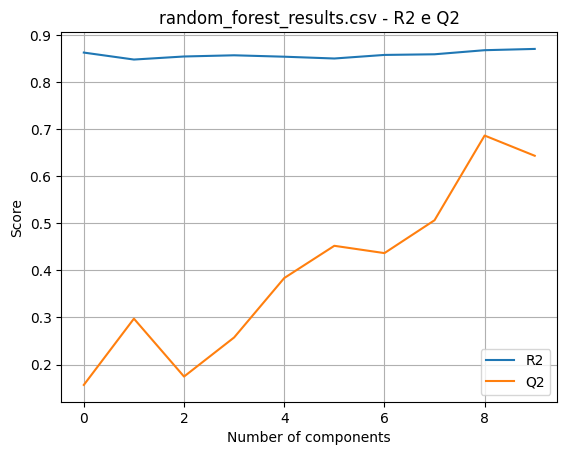

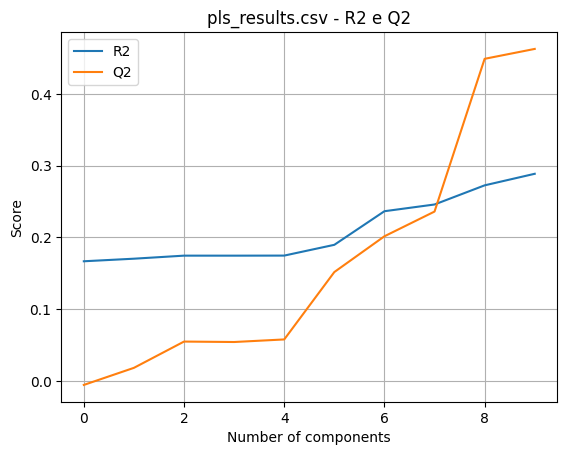

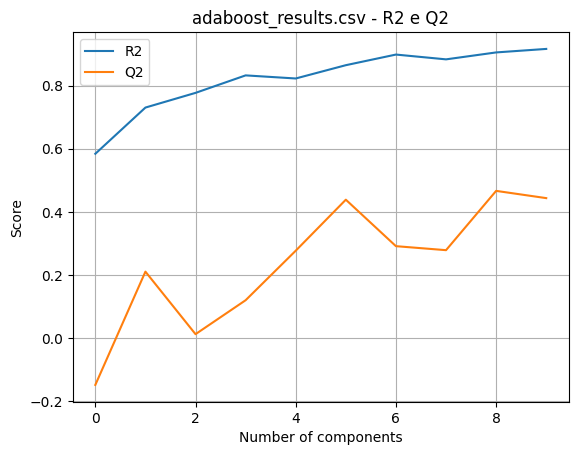

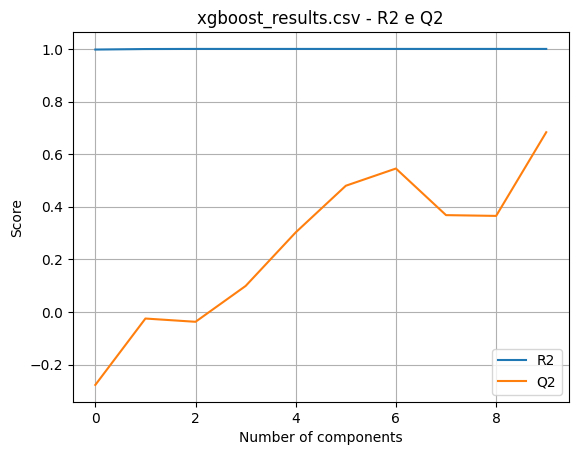

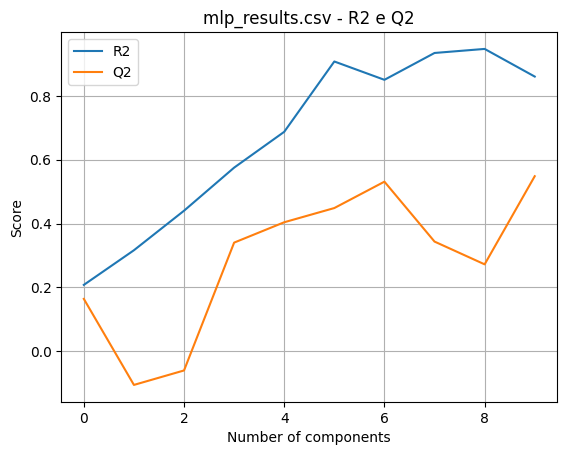

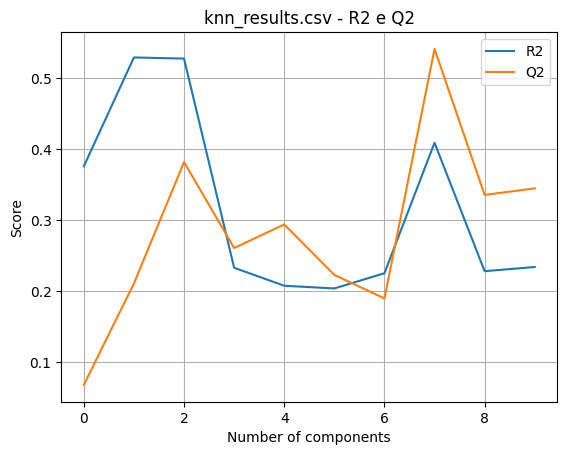

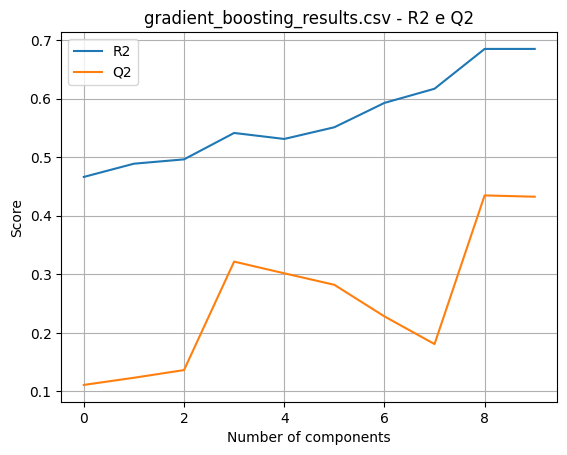

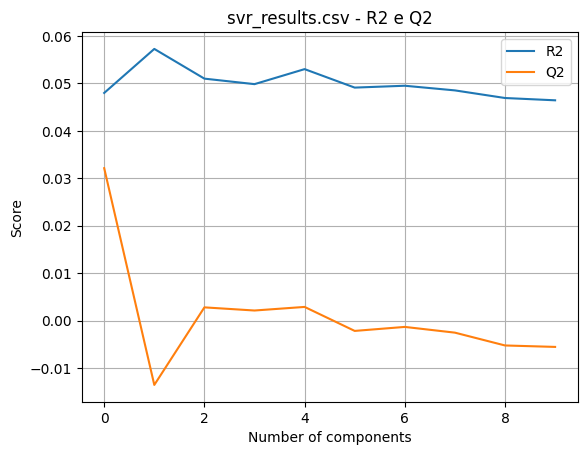

In [5]:
dir_path = '/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/75'
files = os.listdir(dir_path)

for filename in files:
    if filename.endswith('.csv'):
        data = pd.read_csv(os.path.join(dir_path, filename))
        if 'R2' in data.columns and 'Q2' in data.columns:
            plt.figure()
            data['R2'].plot(label='R2')
            data['Q2'].plot(label='Q2')
            plt.title(f'{filename} - R2 e Q2')
            plt.xlabel('Number of components')
            plt.ylabel('Score')
            plt.grid()
            plt.legend()
            plt.show()
            plt.close()